## Função para gerar gráfico scatter

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def scatter_plot_with_correlation_line(x, y,title,xlabel,ylabel, graph_filepath, valor_correlacao):
    '''
    http://stackoverflow.com/a/34571821/395857
    x does not have to be ordered.
    '''

    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)

    # Scatter plot
    ax.scatter(x, y)

    # Add correlation line

    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
    ax.plot(X_plot, m*X_plot + b, '-', color='red')

    props = dict(boxstyle='Square', facecolor='white', alpha=0.5)
    ax.text(0.05, 0.95, valor_correlacao, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    plt.xlabel(xlabel, labelpad=13)
    plt.ylabel(ylabel, labelpad=13)
    plt.title("", y=1.015);

    plt.savefig(graph_filepath)
    plt.close()

In [0]:
import matplotlib.pyplot as plt


#This function takes in the reference values and the prediction values as lists and returns a list with each index corresponding to the total number
#of points within that zone (0=A, 1=B, 2=C, 3=D, 4=E) and the plot
def clarke_error_grid(ref_values, pred_values, title_string, texto):

    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))

    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
    if max(ref_values) > 400 or max(pred_values) > 400:
        print ("Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values)))
    if min(ref_values) < 0 or min(pred_values) < 0:
        print ("Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values)))

    #Clear plot
    plt.clf()

    #Set up plot
    plt.scatter(ref_values, pred_values, marker='o', color='black', s=8)
    plt.title(title_string + " Clarke Error Grid")
    plt.xlabel("'Glucose [mg/dl]'")
    plt.ylabel("'Predição [mg/dl]'")
    plt.xticks([0, 50,60,70, 100, 150, 200])
    plt.yticks([0, 50,60,70, 100, 150, 200])
    plt.gca().set_facecolor('white')

    #Set axes lengths
    plt.gca().set_xlim([70, 200])
    plt.gca().set_ylim([70, 200])
    plt.gca().set_aspect((200)/(200))

    #Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      #Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    #plt.plot([175/3, 320], [70, 400], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    # plt.plot([70, 70], [0, 175/3], '-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 400],[175/3, 320],'-', c='black')
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')

    #Add zone titles
    plt.text(180, 160, "A", fontsize=15)
    plt.text(100, 180, "B", fontsize=15)
    plt.text(180, 120, "B", fontsize=15)
    plt.text(130, 80, texto, fontsize=15)
    #plt.text(160, 370, "C", fontsize=15)
    #plt.text(160, 15, "C", fontsize=15)
    #plt.text(30, 140, "D", fontsize=15)
    #plt.text(370, 120, "D", fontsize=15)
    #plt.text(30, 370, "E", fontsize=15)
    #plt.text(370, 15, "E", fontsize=15)

    #Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A

        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E

        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B

    plt.savefig('Clarke_Error_Grid_'+title_string)
    plt.close()

    return 

# Importação dos dados

In [0]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from math import sin


glucose_file_path = '/content/dados.csv'
glucose_data = pd.read_csv(glucose_file_path)

	
glucose_data['NIRS^2'] =  (glucose_data['NIRS'] * glucose_data['NIRS'] )
glucose_data['Module1^2'] =  (glucose_data['Module1'] * glucose_data['Module1'] )
glucose_data['Module2^2'] =  (glucose_data['Module2'] * glucose_data['Module2'] )
glucose_data['Module3^2'] =  (glucose_data['Module3'] * glucose_data['Module3'] ) 
glucose_data['Phase1^2'] =  (glucose_data['Phase1'] * glucose_data['Phase1'] )
glucose_data['Phase2^2'] =  (glucose_data['Phase2'] * glucose_data['Phase2'] )
glucose_data['Phase3^2'] =  (glucose_data['Phase3'] * glucose_data['Phase3'] ) 


y = glucose_data.Glucometer

#Selecao das colunas da base de dados
feature_columns_normal    = ['NIRS', 'Module1', 'Module2', 'Module3', 'Phase1', 'Phase2', 'Phase3']

# Normalizacao dos dados
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(glucose_data) 
glucose_data.loc[:,:] = scaled_values

# Base com dados normalizados
X_normalizado = glucose_data[feature_columns_normal]


#glucose_data.describe()
X_derivados.head()

Bases_Dados = [X_normalizado]


# Treino e teste dos algoritmos

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#=================================================
# Métrica Mean Squared Relative Error (MSRE)
#=================================================
def metrica_msre(e, a):
  valor = 0

  for i in range(len(e)):
    
    temp = ( (e[i] - a[i]) / a[i] ) * 100.0
    valor = valor + temp * temp
  
  valor = valor / len(e) 

  return round(valor,3)


#=================================================
# Calcula acuracia,desvio e intervalo de confiança
#=================================================
def metricas_estatisticas(e, a):
  
  temp = 0
  media = 0
  for i in range(len(e)):
    temp = temp + (e[i] - a[i])
    media = media + e[i]

  bias = temp / len(e)
  media = media / len(e)

  temp = 0
  for i in range(len(e)):
    temp = temp + (e[i] - media) * (e[i] - media)
  desvio_padrao = np.sqrt(temp / len(e))

  mais_intervalo = round(bias + desvio_padrao,2);
  menos_intervalo = round(bias - desvio_padrao,2);

  return [round(bias,2),round(desvio_padrao,2),menos_intervalo,mais_intervalo]
  

#=================================================
# Funcao utilizada no treinamento e teste do modelo
# Gera os gráficos scatter
#=================================================
def teste_do_modelo2(modelo, treino_X, valor_X, treino_y, valor_y, nome_algoritmo):
  # Predição de treino
  predicao_de_treino = modelo.predict(treino_X)

  # Calcula o erro do treino
  mse_treino = metrica_msre(treino_y.tolist(), predicao_de_treino)

  # Correlação da predicao do treino
  correlacao_treino = round(r2_score(treino_y, predicao_de_treino),3)

   # Predição de teste
  predicao_de_teste = modelo.predict(valor_X)

  # Correlação da predicao do teste
  correlacao_teste = round(r2_score(valor_y, predicao_de_teste),3)

  # Calcula o erro do treino
  mse_teste = metrica_msre(valor_y.tolist(), predicao_de_teste)

  # Geração dos gráficos
  scatter_plot_with_correlation_line(treino_y, predicao_de_treino,'','Glucose [mg/dl]','Predição [mg/dl]', 'Treino_'+nome_algoritmo+'.png', 'R$^2$ '+str(correlacao_treino)+'\nMSRE '+str(mse_treino))
  scatter_plot_with_correlation_line( valor_y, predicao_de_teste, '','Glucose [mg/dl]','Predição [mg/dl]', 'Teste_'+nome_algoritmo+'.png', 'R$^2$ '+str(correlacao_teste)+'\nMSRE '+str(mse_teste))
  


  predicao_completa = predicao_de_teste.tolist()
  predicao_completa.extend(predicao_de_treino.tolist())

  y_completa = valor_y.tolist()
  y_completa.extend(treino_y.tolist())

  correlacao_completa = round(r2_score(y_completa, predicao_completa),3)
  mse_completa = metrica_msre(y_completa, predicao_completa)

  metricas = metricas_estatisticas(predicao_completa,y_completa) 
  clarke_error_grid(y_completa,predicao_completa,nome_algoritmo,'R$^2$ '+str(correlacao_completa)+'\nMSRE '+str(mse_completa))

  # Retorna os resultados
  return mse_treino, correlacao_treino, mse_teste, correlacao_teste, metricas


#=================================================
# Função utilizada na otimizacao dos modelos
#=================================================
def criacao_do_modelo(algoritmo, treino_X, valor_X, treino_y, valor_y):

    # Cria o modelo de teste
    modelo = algoritmo.fit(treino_X, treino_y)

    # Predição de treino
    predicao_de_treino = modelo.predict(treino_X)

    # Calcula o erro do treino
    mse_treino = metrica_msre(treino_y.tolist(), predicao_de_treino)

    # Correlação da predicao do treino
    correlacao_treino = r2_score(treino_y, predicao_de_treino)

    # Predição de teste
    predicao_de_teste = modelo.predict(valor_X)

    # Correlação da predicao do teste
    correlacao_teste = r2_score(valor_y, predicao_de_teste)

    # Calcula o erro do treino
    mse_teste = metrica_msre(valor_y.tolist(), predicao_de_teste)

    
    # Retorna os resultados
    return [modelo, mse_treino >= mse_teste ,mse_treino, correlacao_treino, mse_teste, correlacao_teste]



# Dados dos relatórios

In [0]:
# Resultados do treino
resultados_correlacao_treino = [[],[]]
resultados_mse_treino        = [[],[]]

# Resultados do teste
resultados_correlacao_teste = [[],[]]
resultados_mse_teste        = [[],[]]

# Nome do algoritmo
resultados_algoritmo        = [[],[]]

# Algoritmos

Criação dos algoritmos de machine learning

In [0]:
algoritmos = []
nome_algoritmos = []
nome_curto_algoritmos = []

## Divisão da Base

In [0]:
# Cria as bases de treinamento e teste
treino_X, valor_X, treino_y, valor_y = train_test_split(Bases_Dados[0], y,train_size = 37, random_state = 1)

## Árvore de Decisão

In [170]:
from sklearn.tree import DecisionTreeRegressor


melhor_resultado      = []
melhor_qtde_folhas    = -1
melhor_qt_estimadores = -1
identificou_melhor    = False


# Ajuste de parametros da Árvore de Decisao
for qtde_folhas in range(2,1000):

    # Cria o modelo com o hiperparametro ajustado
    algoritmo = DecisionTreeRegressor(max_leaf_nodes = qtde_folhas)

    # Executar o teste do algorimo j na base de dados i
    # modelo, sucesso, mse_treino, cor_treino, mse_teste, correlacao_teste  
    resultado = criacao_do_modelo(algoritmo,treino_X, valor_X, treino_y, valor_y )
    # Verifica se teve sucesso em generalizar o modelo
    # ou seja, o teste deve ter melhor performance que o treinamento
    if(resultado[1]):
      #print("qtde folhas : ",qtde_folhas,"Treino [ M=", mse_treino, ", R=",cor_treino,"] Teste [M=",mse_teste,",R=",correlacao_teste,"]")
      # identifica o melhor algoritmo
      if(identificou_melhor == False or melhor_resultado[4] > resultado[4]):
        melhor_resultado = resultado
        melhor_qtde_folhas = qtde_folhas
        identificou_melhor = True

if (identificou_melhor):

  print("+------------------------------------------+")
  print("|     Modelo de Arvore          |")
  print("+------------------------------------------+")
  print("| Qtde de Folhas : ",melhor_qtde_folhas)
  print("| MSE : ",melhor_resultado[4])
  print("+------------------------------------------+")

  algoritmos.append(melhor_resultado[0])
  nome_algoritmos.append('DecisionTree')
  nome_curto_algoritmos.append('DTree')
else:
  print("+------------------------------------------+")
  print("|     Nao gerou Modelo de Arvore      |")
  print("+------------------------------------------+")

+------------------------------------------+
|     Modelo de Arvore          |
+------------------------------------------+
| Qtde de Folhas :  5
| MSE :  32.055
+------------------------------------------+


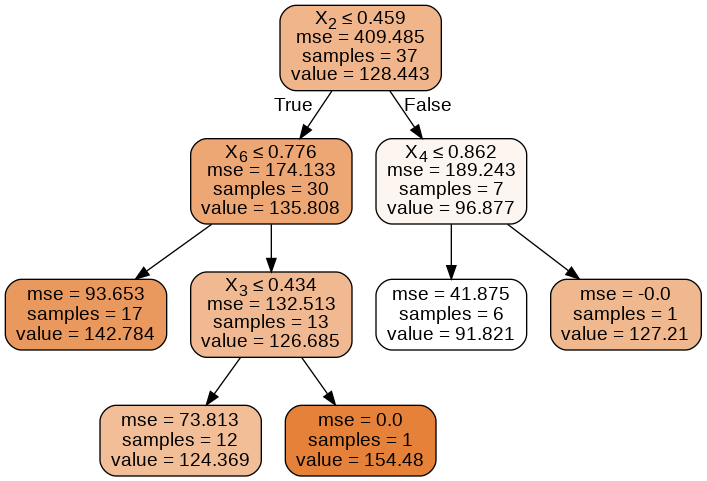

In [171]:
# Gera imagem da arvore de decisao
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(algoritmos[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# ANN - Multilayered Perceptron regressor.

In [172]:
from sklearn.neural_network import MLPRegressor


melhor_resultado = []
melhor_ativacao   = ''
melhor_tamanho_camadas_escondidas   = -1
melhor_rate = 0
identificou_melhor   = False

lista = ['identity', 'logistic', 'tanh', 'relu']

rates = []
m = 0.001
for i in range(10):
  rates.append(m)
  m = m + 0.001

for tamanho_camadas in range(1,200):
 for l in lista:
  for r in rates:
    algoritmo = MLPRegressor(hidden_layer_sizes=(tamanho_camadas,),
                                       solver='lbfgs',
                                       activation=l,
                                       learning_rate='adaptive',
                                       max_iter=100,
                                       learning_rate_init=r,
                                       alpha=0.01)

    # Executar o teste do algorimo j na base de dados i
    # modelo, sucesso, mse_treino, cor_treino, mse_teste, correlacao_teste  
    resultado = criacao_do_modelo(algoritmo,treino_X, valor_X, treino_y, valor_y )
    # Verifica se teve sucesso em generalizar o modelo
    # ou seja, o teste deve ter melhor performance que o treinamento
    if(resultado[1]):
      #print("camadas : ",camadas,"activation : ",l,"Treino [ M=", mse_treino, ", R=",cor_treino,"] Teste [M=",mse_teste,",R=",correlacao_teste,"]")
      # identifica o melhor algoritmo
      if(identificou_melhor == False or melhor_resultado[4] > resultado[4]):
        melhor_resultado = resultado
        melhor_ativacao = l
        melhor_rate = r
        melhor_tamanho_camadas_escondidas = tamanho_camadas
        identificou_melhor = True

if (identificou_melhor):

  print("+------------------------------------------+")
  print("|     Modelo de ANN                        |")
  print("+------------------------------------------+")
  print("| Ativacao : ",melhor_ativacao)
  print("| Tamanho camadas escondidas : ",melhor_tamanho_camadas_escondidas)
  print("| Melhor Learning Rate : ",melhor_rate)
  print("| MSE : ",melhor_resultado[4])
  print("+------------------------------------------+")

  algoritmos.append(melhor_resultado[0])
  nome_algoritmos.append('ANN')
  nome_curto_algoritmos.append('  ANN')

else:

  print("+------------------------------------------+")
  print("|     Nao gerou Modelo de ANN              |")
  print("+------------------------------------------+")

+------------------------------------------+
|     Modelo de ANN                        |
+------------------------------------------+
| Ativacao :  logistic
| Tamanho camadas escondidas :  21
| Melhor Learning Rate :  0.003
| MSE :  1.462
+------------------------------------------+



# Experimentos

Execução dos experimentos

In [0]:

resultados_metricas = [[]]


for j in range(len(algoritmos)):

    total_mse_treino = 0;
    total_cor_treino = 0;
    total_mse_teste = 0;
    total_correlacao_teste = 0;

    # Executar o teste do algorimo j na base de dados i
    mse_treino, cor_treino, mse_teste, correlacao_teste, metricas  = teste_do_modelo2(algoritmos[j],treino_X, valor_X, treino_y, valor_y, nome_algoritmos[j])
    total_mse_treino = total_mse_treino + mse_treino
    total_cor_treino = total_cor_treino + cor_treino
    total_mse_teste = total_mse_teste + mse_teste
    total_correlacao_teste = total_correlacao_teste + correlacao_teste

    # reportar os resultados
    resultados_correlacao_treino[0].append(round(total_cor_treino,3))
    resultados_mse_treino[0].append(round(total_mse_treino,3))
    resultados_correlacao_teste[0].append(round(total_correlacao_teste,3))
    resultados_mse_teste[0].append(round(total_mse_teste,3))
    resultados_algoritmo[0].append(nome_curto_algoritmos[j])
    resultados_metricas[0].append(metricas)

# Resultados

In [174]:
# Imprimir os resultados

for j in range(len(resultados_algoritmo)):
  print("+-----------------------------------------------+")
  print("|                Treinamento ",j,"                |")
  print("+-----------------------------------------------+")
  print('Algoritmo: ',end=(''))
  for i in range(len(resultados_algoritmo[j])):
    print(resultados_algoritmo[j][i].ljust(6)+'\t',end=(''))

  print('')
  print('R^2Treino: ',end=(''))
  for i in range(len(resultados_correlacao_treino[j])):
    print(str(resultados_correlacao_treino[j][i]).ljust(6)+'\t',end=(''))


  print('')
  print('mseTreino: ',end=(''))
  for i in range(len(resultados_mse_treino[j])):
    print(str(resultados_mse_treino[j][i]).ljust(6)+'\t',end=(''))


  print('')
  print('---')
  print('R^2 Teste: ',end=(''))
  for i in range(len(resultados_correlacao_teste[j])):
    print(str(resultados_correlacao_teste[j][i]).ljust(6)+'\t',end=(''))


  print('')
  print('mse Teste: ',end=(''))
  for i in range(len(resultados_mse_teste[j])):
    print(str(resultados_mse_teste[j][i]).ljust(6)+'\t',end=(''))
  print('')

  print('')
  print('Metricas: ',end=(''))
  for i in range(len(resultados_mse_teste[j])):
    print(str(resultados_metricas[j][i]).ljust(6)+'\t',end=(''))
  print('')

+-----------------------------------------------+
|                Treinamento  0                 |
+-----------------------------------------------+
Algoritmo: DTree 	  ANN 	
R^2Treino: 0.82  	0.974 	
mseTreino: 44.637	5.813 	
---
R^2 Teste: 0.888 	0.995 	
mse Teste: 32.055	1.462 	

Metricas: [1.06, 19.21, -18.15, 20.28]	[-0.1, 20.23, -20.32, 20.13]	
+-----------------------------------------------+
|                Treinamento  1                 |
+-----------------------------------------------+
Algoritmo: 
R^2Treino: 
mseTreino: 
---
R^2 Teste: 
mse Teste: 

Metricas: 


# Limpar diretório

In [0]:
import os
import glob

files = glob.glob('/content/*')
for f in files:
    try:
      #os.remove(f)
      a =0
    except OSError:
      a= 0;